# Import Statements and Loading Data

In [ ]:
#Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [ ]:
train = pd.read_csv("../data/medal_smaller_train.csv")
test = pd.read_csv("../data/medal_smaller_test.csv")
validation = pd.read_csv("../data/medal_smaller_validation.csv")

In [ ]:
print(len(train))
print(len(test))
print(len(validation))

3000000
1000000
1000000


# Exploratory Data Analysis and Data Cleaning

In [ ]:
train.head()

,Unnamed: 0,abstract_id,text,location,label
0,0,14145090,velvet antlers vas are commonly used in tradit...,[63],['transverse aortic constriction']
1,1,1900667,the clinical features of our cases demonstrate...,[85],['hodgkins lymphoma']
2,2,8625554,ceftobiprole bpr is an investigational cephalo...,[90],['methicillinsusceptible s aureus']
3,3,8157202,we have taken a basic biologic RPA to elucidat...,[26],['parathyroid hormonerelated protein']
4,4,6784974,lipoperoxidationderived aldehydes for example ...,[157],['lipoperoxidation']


In [ ]:
#example of text
train.text[0]

'velvet antlers vas are commonly used in traditional chinese medicine and invigorant and contain many PET components for health promotion the velvet antler peptide svap is one of active components in vas based on structural study the svap interacts with tgfÎ² receptors and disrupts the tgfÎ² pathway we hypothesized that svap prevents cardiac fibrosis from pressure overload by blocking tgfÎ² signaling SDRs underwent TAC tac or a sham operation T3 one month rats received either svap mgkgday or vehicle for an additional one month tac surgery induced significant cardiac dysfunction FB activation and fibrosis these effects were improved by treatment with svap in the heart tissue tac remarkably increased the expression of tgfÎ² and connective tissue growth factor ctgf ROS species C2 and the phosphorylation C2 of smad and ERK kinases erk svap inhibited the increases in reactive oxygen species C2 ctgf expression and the phosphorylation of smad and erk but not tgfÎ² expression in cultured cardi

In [ ]:
#looking at abbreviation
train.text[0].split()[63]

'TAC'

In [ ]:
#looking at structure of location column
train['location'].value_counts()

location
[0]      84375
[1]      38055
[3]      33892
[6]      33524
[5]      33440
         ...  
[570]        1
[691]        1
[588]        1
[861]        1
[559]        1
Name: count, Length: 767, dtype: int64

In [ ]:
#cleaning location and label columns
def clean_location(location):
  """Takes a number in brackets as input and reterns the number as an int"""
  #if else so you won't ruin the data if you run this cell twice by accident
  #if "[" is in location:
    #return int(location[1:-1])
  #else:
  return int(str(location).strip("[]"))

def clean_label(label):
  """Takes a label in brackets and quotes as input and reterns the label as a string"""
  #if else so you won't ruin the data if you run this cell twice by accident
  #if "[" is in label:
    #return label[2:-2]
  #else:
  return label.strip("[]'")

for dataset in [train, test, validation]:
  dataset['location'] = dataset['location'].apply(clean_location)
  dataset['label'] = dataset['label'].apply(clean_label)

train.head()

,Unnamed: 0,abstract_id,text,location,label
0,0,14145090,velvet antlers vas are commonly used in tradit...,63,transverse aortic constriction
1,1,1900667,the clinical features of our cases demonstrate...,85,hodgkins lymphoma
2,2,8625554,ceftobiprole bpr is an investigational cephalo...,90,methicillinsusceptible s aureus
3,3,8157202,we have taken a basic biologic RPA to elucidat...,26,parathyroid hormonerelated protein
4,4,6784974,lipoperoxidationderived aldehydes for example ...,157,lipoperoxidation


In [ ]:
#abbreviation where abbreviation location = 0
train[train['location'] == 0]['text']

51         HS is the leading cause of preventable deaths ...
151        CC cc most commonly results from calcium pyrop...
304        GCS gcs is an important target for clinical dr...
313        tau is a microtubuleassociated protein that is...
318        PT delivery represents an important cause of i...
                                 ...                        
2999798    IM im is associated with the risk of developin...
2999802    OMT omt is a promising adjunctive treatment fo...
2999808    SRC srcaib is a member of the p nuclear recept...
2999937    PCD and quantification of prion infectivity is...
2999956    LPN lpn remains a technically challenging proc...
Name: text, Length: 84375, dtype: object

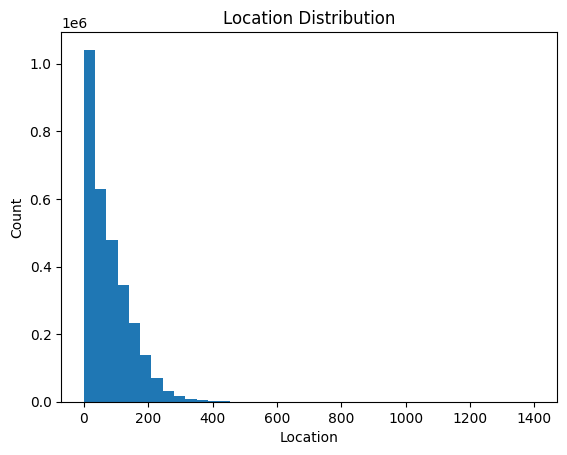

In [ ]:
#plotting location
plt.hist(train['location'], bins = 40)
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

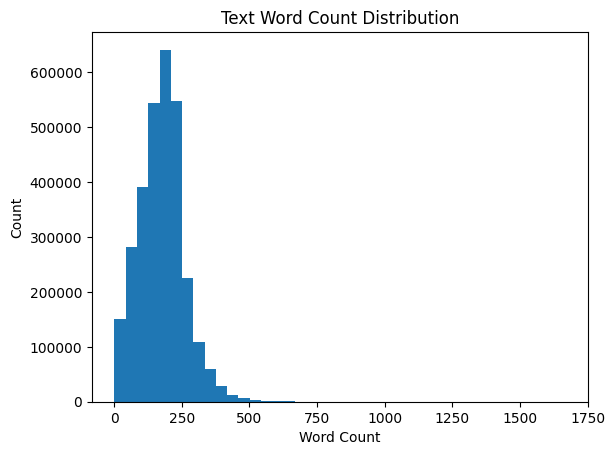

In [ ]:
#Plotting text word count
plt.hist(train['text'].apply(lambda x: len(x.split())), bins = 40)
plt.title('Text Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()

In [ ]:
#Average length of abbreviation
length = []
for index in range(len(train)):
  length.append(len(train['text'][index].split()[train['location'][index]]))
print(np.average(length))


2.780022


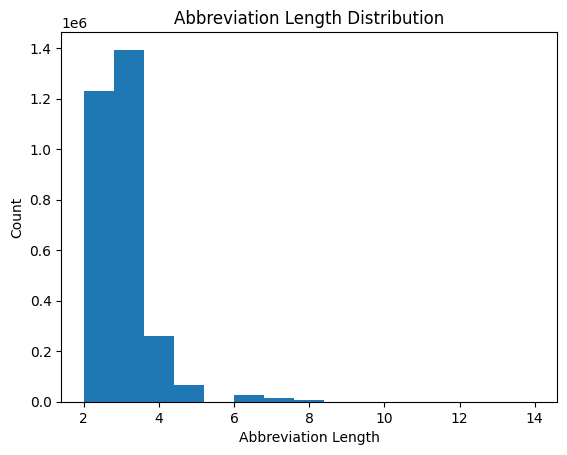

In [ ]:
#Plotting distribution of abbreviation lengths
plt.hist(length, bins = 15)
plt.title('Abbreviation Length Distribution')
plt.xlabel('Abbreviation Length')
plt.ylabel('Count')
plt.show()

In [ ]:
#What are 8 character abbreviations?
for index in range(len(train)):
  abbreviation = train['text'][index].split()[train['location'][index]]
  if len(abbreviation) == 8:
    print(abbreviation)


Streaming output truncated to the last 5000 lines.
O-GlcNAc
alpha-MG
Neuro-2a
Neuro-2a
Matrigel
HIV/AIDS
SAPK/JNK
DNA-PKcs
HTLV-III
SDS-PAGE
allo-SCT
SDS-PAGE
FEF25-75
V-ATPase
allo-BMT
Neuro-2a
NOD/SCID
allo-SCT
DNA-PKcs
SDS-PAGE
Neuro-2a
allo-BMT
O-GlcNAc
Matrigel
DNA-PKcs
SDS-PAGE
HTLV-III
SDS-PAGE
Matrigel
BS-RNase
beta-gal
HIV/AIDS
SAPK/JNK
CHSE-214
anti-CCP
HTLV-III
Neuro-2a
Matrigel
Matrigel
SDS-PAGE
allo-BMT
SDS-PAGE
Neuro-2a
allo-BMT
Neuro-2a
allo-BMT
V-ATPase
NOD/SCID
DNA-PKcs
Matrigel
O-GlcNAc
SDS-PAGE
Matrigel
allo-SCT
beta-gal
NG108-15
Neuro-2a
SDS-PAGE
allo-BMT
ADAS-Cog
dP/dtmax
SAPK/JNK
ADAS-Cog
anti-CCP
Matrigel
allo-BMT
bHLH-Zip
allo-SCT
NOD/SCID
Neuro-2a
beta-gal
Matrigel
HIV/AIDS
anti-CCP
Neuro-2a
NOD/SCID
allo-BMT
anti-CCP
Matrigel
anti-CCP
Matrigel
WAIS-III
SDS-PAGE
anti-CCP
beta-gal
allo-SCT
Matrigel
Neuro-2a
CRABP-II
rhGM-CSF
anti-CCP
Neuro-2a
anti-CCP
SDS-PAGE
NG108-15
beta-gal
allo-SCT
Neuro-2a
BS-RNase
allo-BMT
Matrigel
allo-SCT
Matrigel
HIV/AIDS
SAPK/JNK
allo

In [ ]:
#How many different labels are there?
print(len(train['label'].unique()))

22555


In [ ]:
#List of expansions per abbreviation
#runtime is long- edit to print less examples and maybe add a count for expansions
abbreviation_expansions = {}

for index, row in train.iterrows():
    abbreviation = row['text'].split()[row['location']]
    expansion = row['label']
    if abbreviation not in abbreviation_expansions:
        abbreviation_expansions[abbreviation] = []
    if expansion not in abbreviation_expansions[abbreviation]:
        abbreviation_expansions[abbreviation].append(expansion)

for abbreviation, expansions in abbreviation_expansions.items():
    print(f"{abbreviation}: {expansions}")

Streaming output truncated to the last 5000 lines.
TB: ['triceps brachii', 'tributyrin', 'trapezoid body', 'tracheobronchial', 'tumorbearing', 'theobromine', 'tuberculous', 'trypan blue', 'thoroughbred', 'tissue basophils', 'toluidine blue', 'total body', 'thiobenzamide', 'testosterone buciclate', 'trisborate']
IPC: ['ionpair chromatography', 'intraperitoneal chemotherapy', 'intermittent pneumatic compression', 'intrapulmonary chemoreceptors', 'ifnalpha producing cells']
MCC: ['maternal cell contamination', 'metacerebral cell', 'mandibular condylar cartilage', 'microcrystalline cellulose', 'methylcrotonylcoa carboxylase', 'meningococcal c conjugate', 'moth cytochrome c', 'meningococcal serogroup c conjugate']
FI: ['fecal incontinence', 'food intake', 'fluorescence intensity', 'fixed interval', 'fluorescent intensity', 'furcation involvement', 'purified fraction', 'feed intake', 'fasting insulin', 'fatigue index', 'fundamental imaging', 'under a fixedinterval']
PLE: ['pressurized liquid